# Random Forest and Decision Trees

![Image of Regression](https://www.researchgate.net/profile/Carmen_Aleman/publication/6308052/figure/download/fig1/AS:371012928589827@1465467783745/Decision-tree-showing-the-risk-of-malignant-effusion-when-medical-history-and-diagnostic.png)




## Decision Trees

Decision trees can be used for both classification and regression.  They are similar to if/then statements.

Tree depth: how many questions do we ask until we reach our decision? (denoted by its longest route)

Root node: first decision
Leaf node: final node of the tree

Advantages: 
* super easy to interpret
* can use both qualitative and quantitative predictors and responses
* reproducible in clinical workflow
* fast and perform well on large datasets

Disadvantages:
* need an optimal choice at each node; at each step, the algorithm chooses the best result. Choosing the best result at a given step does not ensure an optimal decision when you make it to the leaf node
* prone to over-fitting, especially with deep trees (fix: can set a max depth--this limits variance, but at the expense of bias!)

In [1]:
#We are going to focus on Classification, 
#predicting if a patient is diabetic or not

## load the data
#install.packages("mlbench")
#install.packages("corrplot")
#install.packages("caret")
#install.packages("randomForest")
#install.packages("e1071")
#install.packages("tree")
#install.packages("dplyr", dependencies = TRUE)
#library(dplyr)
library(mlbench)
library(corrplot)
library(caret)
library(randomForest)
library(tree)
library(e1071)


data("PimaIndiansDiabetes2", package = "mlbench")
?PimaIndiansDiabetes

## set seed for randomization
set.seed(123)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘generics’, ‘rlang’, ‘recipes’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded
Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
head(PimaIndiansDiabetes2)
pima<- PimaIndiansDiabetes2
## next we need to create a factor from our response variable
pima$diabetes <- as.factor(pima$diabetes)
nrow(pima)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,NA,33.6,0.627,50,pos
1,85,66,29,NA,26.6,0.351,31,neg
8,183,64,NA,NA,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,NA,NA,25.6,0.201,30,neg


[1] 768

#### What to do about missing data?
First, we have a lot of missing values--missing values are inherent in MANY forms of medical informatics data.

Random forest models do not handle missing values.

Therefore, you can either:
* use a different model or tool (rpart works with random forest with missing values)
* impute missing values
* predict them seperately
* delete all missing value cases



In [3]:
sapply(pima, function(x) sum(is.na(x)))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        5       35      227      374       11        0        0 
diabetes 
       0

[1] 392

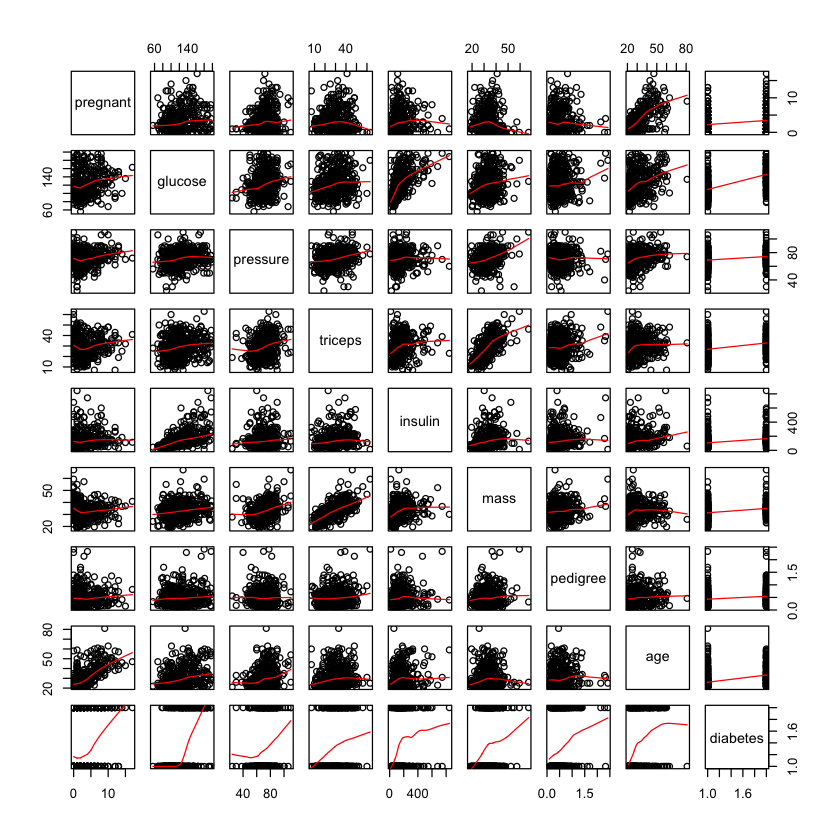

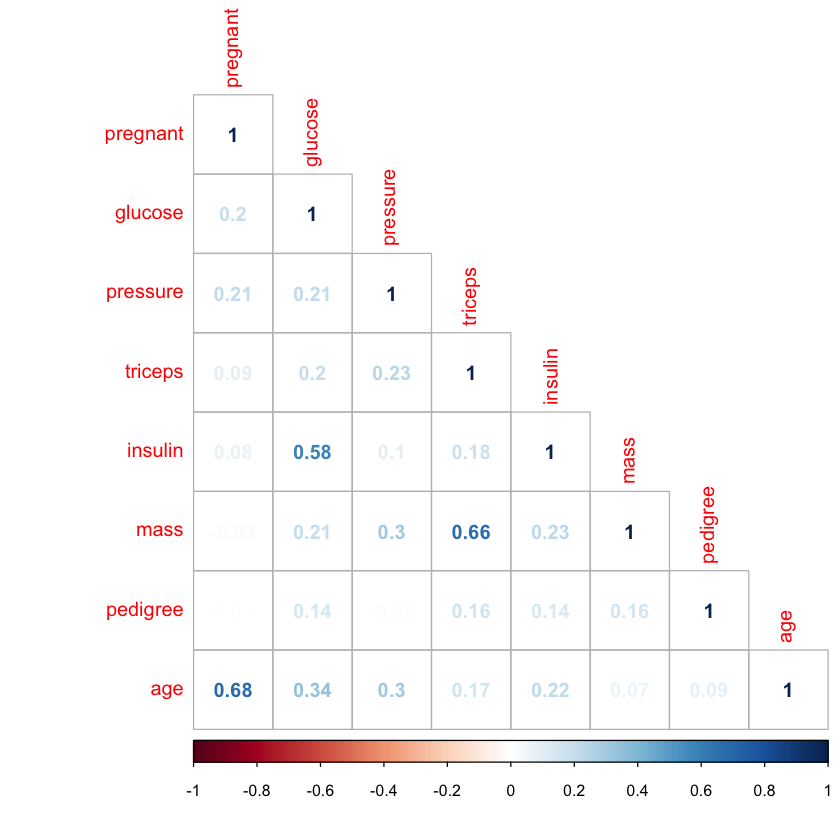

In [4]:
# for now we will ignore the missing data
pima_nomiss<- na.omit(pima)
nrow(pima_nomiss)
# exploratory analysis of our data
#scatterplot
pairs(pima_nomiss, panel = panel.smooth)
#correlation matrix
corrplot(cor(pima_nomiss[, -9]), type = "lower", method = "number")

In [5]:
## split our data into train and test sets

# Set the fraction of the training data
training.fraction <- 0.7

# Train and Test Split using randomization
sample.size <- nrow(pima_nomiss)
index <- sample(1:sample.size)
n.train <- floor(sample.size*training.fraction)
training.data <- pima_nomiss[index[1:n.train],]
testing.data <- pima_nomiss[-index[1:n.train],]
dim(training.data)
dim(testing.data)

[1] 274   9

[1] 118   9

In [6]:
## decision tree of classifying to diabetes

# Training The Model
treemod <- tree(diabetes ~ ., data = training.data)

summary(treemod)




Classification tree:
tree(formula = diabetes ~ ., data = training.data)
Variables actually used in tree construction:
[1] "glucose"  "age"      "pedigree" "pressure" "insulin"  "triceps" 
Number of terminal nodes:  18 
Residual mean deviance:  0.5642 = 144.4 / 256 
Misclassification error rate: 0.1241 = 34 / 274 

The results show that six variables ("glucose"  "age"      "pedigree" "pressure" "insulin"  "triceps") are used in building the decision tree. With a training error rate of 12.41% and 18 terminal nodes.

In [7]:
treemod # get a detailed text output.

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 274 342.500 neg ( 0.68248 0.31752 )  
    2) glucose < 127.5 170 138.400 neg ( 0.85882 0.14118 )  
      4) age < 22.5 40   0.000 neg ( 1.00000 0.00000 ) *
      5) age > 22.5 130 124.400 neg ( 0.81538 0.18462 )  
       10) pedigree < 0.4955 75  41.820 neg ( 0.92000 0.08000 )  
         20) pressure < 81 65  17.860 neg ( 0.96923 0.03077 ) *
         21) pressure > 81 10  13.460 neg ( 0.60000 0.40000 ) *
       11) pedigree > 0.4955 55  69.550 neg ( 0.67273 0.32727 )  
         22) age < 43.5 49  56.700 neg ( 0.73469 0.26531 )  
           44) glucose < 96.5 16   7.481 neg ( 0.93750 0.06250 ) *
           45) glucose > 96.5 33  43.260 neg ( 0.63636 0.36364 )  
             90) insulin < 195.5 27  37.100 neg ( 0.55556 0.44444 )  
              180) pressure < 59 7   5.742 neg ( 0.85714 0.14286 ) *
              181) pressure > 59 20  27.530 pos ( 0.45000 0.55000 )  
                362) pressure < 67 7   5

The results display the split criterion (e.g. Plasma_Glucose < 127.5), the number of observations in that branch, the deviance, the overall prediction for the branch (Yes or No), and the fraction of observations in that branch that take on values of Yes and No. Branches that lead to terminal nodes are indicated using asterisks.

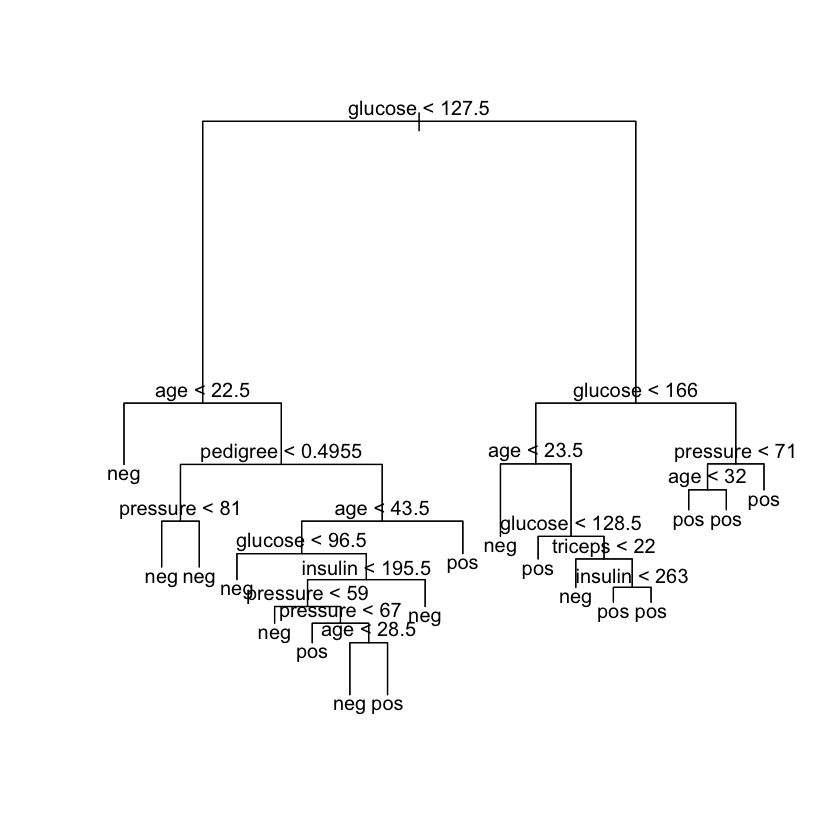

In [8]:
plot(treemod)
text(treemod, pretty = 0)

In [9]:
### Lets test the model using our held-out test set.

tree_pred <- predict(treemod, newdata = testing.data, type = "class" )
confusionMatrix(tree_pred, testing.data$diabetes)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  59  14
       pos  16  29
                                          
               Accuracy : 0.7458          
                 95% CI : (0.6574, 0.8214)
    No Information Rate : 0.6356          
    P-Value [Acc > NIR] : 0.007268        
                                          
                  Kappa : 0.4566          
 Mcnemar's Test P-Value : 0.855132        
                                          
            Sensitivity : 0.7867          
            Specificity : 0.6744          
         Pos Pred Value : 0.8082          
         Neg Pred Value : 0.6444          
             Prevalence : 0.6356          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6186          
      Balanced Accuracy : 0.7305          
                                          
       'Positive' Class : neg             
                                          

![Image of Regression](https://img.grepmed.com/uploads/1480/negativepredictivevalue-positivepredictivevalue-epidemiology-sensitivity-calculation-original.gif)

We can also find the F1 score, which is the harmonic mean of precision (PPV) and recall (sensitivity).  

In [10]:
A<- confusionMatrix(tree_pred, testing.data$diabetes)

In [11]:
F1<- 2* (A$byClass['Sensitivity']* A$byClass['Pos Pred Value'])/(A$byClass['Sensitivity']+ A$byClass['Pos Pred Value'])
F1

Sensitivity 
  0.7972973

## Random Forests

Remember: decision trees have high variance and high bias.  We would like to minimize both!

A random forest is a collection of decision trees whose results are aggregated into one final result.

They limit overfitting without substantially increasing bias!

How do they reduce variance?
* training on different random subsamples
* training on different randomized subsets of features

This is really great for medical data because we usually have a ton of features and creating a lot of decision trees, we should include a lot of important features for classification.

For random forests we need to assess hyperparameters, so we should split our training data into training and validation sets OR use cross validation.

In [12]:
# Set the fraction of the training data
training.fraction <- 0.8

# Split training data into train and validation
sample.size <- nrow(training.data)
index <- sample(1:sample.size)
n.train <- floor(sample.size*training.fraction)
training.data <- training.data[index[1:n.train],]
validation.data <- training.data[-index[1:n.train],]
dim(training.data)
dim(validation.data)

[1] 219   9

[1] 44  9

# run a random forest model on the training set

## How do you choose m?

For classification, the default value of $m=\sqrt{p}$.  Since, $p=8$, this default value is 2.83 (rounded to 3).  In addition, $m=p=8$, $m=p/2=4$, and $m=2$ will be assessed. $m=\{2,3,4,8\}$.  We will run 1000 trees for each m.


m = c(3,4,6,8)
  for (j in m){ 
    rf.pima<-randomForest(diabetes ~., data=training.data,  mtry=j, ntree=500, importance=T)
    # get error rate for validation data
    yhat=predict(rf.pima, validation.data)
    y=validation.data$diabetes
    error_rate_validation <- mean(y != yhat)
    if (exists('err')==FALSE){
      err = c(j,error_rate_validation)}# create initial data frame
    else{
      err = rbind(err, c(j,error_rate_validation))# append to data frame of error rates, ntree, and mtry
    }
  }

err <- as.data.frame(err) # convert to data frame
names(err) <- c('mtry', 'rate') # add column names
#err$mtry <- as.numeric(err$mtry) # mtry to factor
err <- err %>% arrange(mtry)
library(ggplot2)
ggplot(err, aes(x=as.factor(mtry), y=rate, group=Error_Type)) + geom_line(aes(color=Error_Type)) +xlab("M") + ylab("Missclassification Error") + ggtitle("Sensitivity of M for Random Forest") 
# create plot
err

Each bagged tree makes use of around two-thirds of the observations. The remaining one-third of the observations not used to fit a given bagged tree are referred to as the out-of-bag (OOB) observations.

For each tree, OOB error is the model error in predicting the data left out of the training set for that tree. OOB is a very straightforward way to estimate the test error of a bagged model, without the need to perform cross-validation or the validation set approach.


Call:
 randomForest(formula = diabetes ~ ., data = training.data, mtry = 3,      ntree = 1000, importance = T) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 26.48%
Confusion matrix:
    neg pos class.error
neg 126  21   0.1428571
pos  37  35   0.5138889

,neg,pos,MeanDecreaseAccuracy,MeanDecreaseGini
pregnant,17.111832,-8.5397854,10.029295,8.036491
glucose,25.124065,23.1374486,32.963936,22.183117
pressure,1.008227,3.3397533,3.234047,7.568200
triceps,6.885034,0.7852507,5.950969,7.856969
insulin,2.970159,7.2201150,7.244105,12.789616
mass,10.003095,3.3896061,10.101568,11.424172
pedigree,10.349135,6.3186679,11.622729,12.081309
age,15.981518,14.1995294,21.737596,14.145322


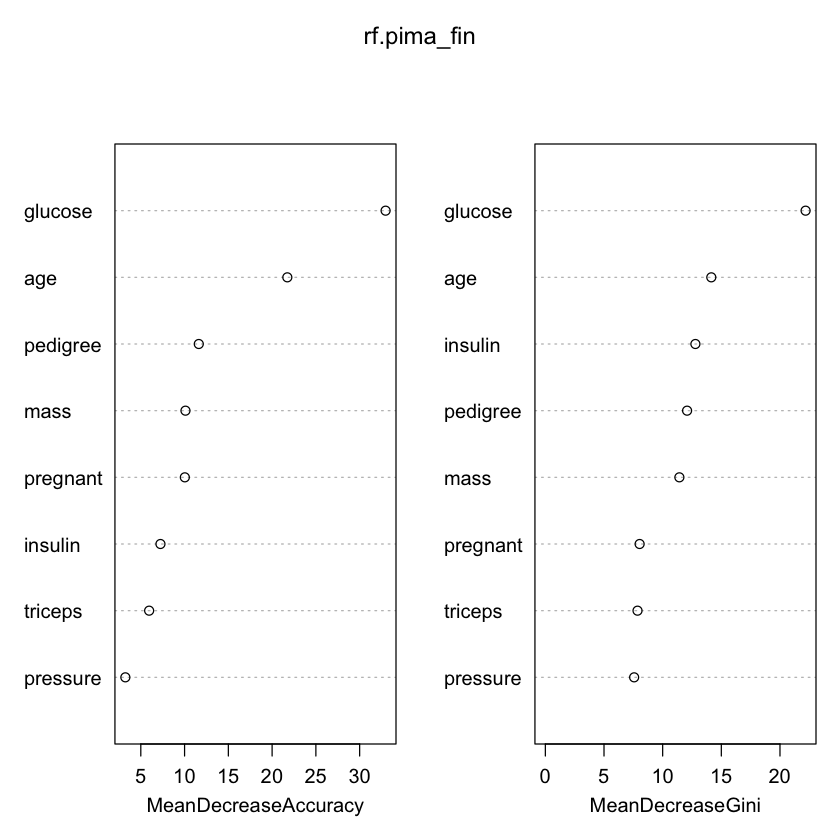

In [13]:
rf.pima_fin<-randomForest(diabetes ~., data=training.data,  mtry=3, ntree=1000, importance=T)
rf.pima_fin
importance(rf.pima_fin)
varImpPlot(rf.pima_fin, sort=T)

In [14]:
yhat = predict(rf.pima_fin, testing.data)
y = testing.data$diabetes
mean(y != yhat)

[1] 0.2033898

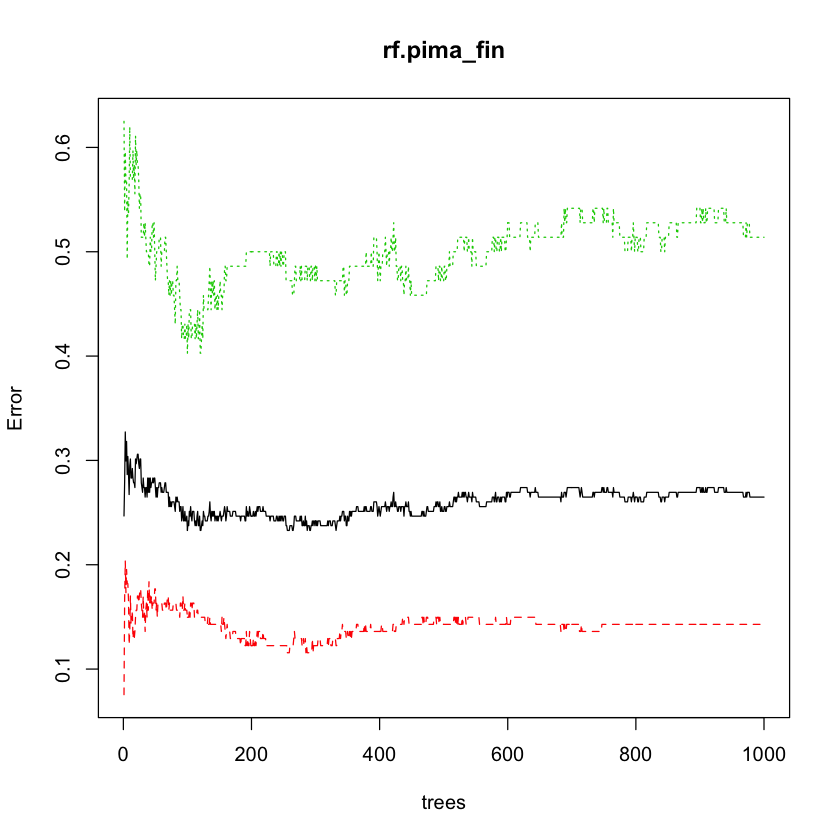

In [15]:
plot(rf.pima_fin)

In [17]:
## with cross validation
# split our data into train and test sets

# Set the fraction of the training data
training.fraction <- 0.7

# Train and Test Split using randomization
sample.size <- nrow(pima_nomiss)
index <- sample(1:sample.size)
n.train <- floor(sample.size*training.fraction)
training.data <- pima_nomiss[index[1:n.train],]
testing.data <- pima_nomiss[-index[1:n.train],]
dim(training.data)
dim(testing.data)

# Fit the model on the training set
model <- train(
  diabetes ~., data = training.data, method = "rf",
  trControl = trainControl("cv", number = 10),
  importance = TRUE
  )
# Best tuning parameter
model$bestTune
# Final model
model$finalModel
# Make predictions on the test data
predicted.classes <- predict(model,testing.data)
# Compute model accuracy rate
mean(predicted.classes == testing.data$diabetes)

#Compute error
mean(predicted.classes != testing.data$diabetes)

[1] 274   9

[1] 118   9

,mtry
3,8



Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 8

        OOB estimate of  error rate: 24.09%
Confusion matrix:
    neg pos class.error
neg 159  27   0.1451613
pos  39  49   0.4431818

[1] 0.7966102

[1] 0.2033898